In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [26]:
!pip install tensorflow keras pillow numpy tqdm

In [27]:
pip install Keras-Preprocessing

In [4]:
# Import standard libraries
import os
import string
import numpy as np
from PIL import Image
from pickle import dump, load
from tqdm import tqdm

# Import Keras and TensorFlow components
from tensorflow.keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Concatenate, Input, Dense, LSTM, Embedding, Dropout
from tensorflow.keras.models import Model, load_model

In [28]:
# Loading a text file into memory
def load_doc(filename):
    # Opening the file as read only
    file = open(filename, 'r')
    text = file.read()
    file.close()
    return text

# get all imgs with their captions
def all_img_captions(filename):
    file = load_doc(filename)
    captions = file.split('\n')
    descriptions ={}
    for caption in captions[:-1]:
        img, caption = caption.split('\t')
        if img[:-2] not in descriptions:
            descriptions[img[:-2]] = [ caption ]
        else:
            descriptions[img[:-2]].append(caption)
    return descriptions

#Data cleaning- lower casing, removing puntuations and words containing numbers
def cleaning_text(captions):
    table = str.maketrans('','',string.punctuation)
    for img,caps in captions.items():
        for i,img_caption in enumerate(caps):

            img_caption.replace("-"," ")
            desc = img_caption.split()

            #converts to lowercase
            desc = [word.lower() for word in desc]
            #remove punctuation from each token
            desc = [word.translate(table) for word in desc]
            #remove hanging 's and a
            desc = [word for word in desc if(len(word)>1)]
            #remove tokens with numbers in them
            desc = [word for word in desc if(word.isalpha())]
            #convert back to string

            img_caption = ' '.join(desc)
            captions[img][i]= img_caption
    return captions

def text_vocabulary(descriptions):
    # build vocabulary of all unique words
    vocab = set()

    for key in descriptions.keys():
        [vocab.update(d.split()) for d in descriptions[key]]

    return vocab

#All descriptions in one file
def save_descriptions(descriptions, filename):
    lines = list()
    for key, desc_list in descriptions.items():
        for desc in desc_list:
            lines.append(key + '\t' + desc )
    data = "\n".join(lines)
    file = open(filename,"w")
    file.write(data)
    file.close()

In [29]:
# Set these path according to project folder in you system
dataset_text = "/content/drive/MyDrive/minor/Flickr8k_text"
dataset_images = "/content/drive/MyDrive/minor/Flicker8k_Dataset"

#we prepare our text data
filename = dataset_text + "/" + "Flickr8k.token.txt"
#loading the file that contains all data
#mapping them into descriptions dictionary img to 5 captions
descriptions = all_img_captions(filename)
print("Length of descriptions =" , len(descriptions))

#cleaning the descriptions
clean_descriptions = cleaning_text(descriptions)

#building vocabulary
vocabulary = text_vocabulary(clean_descriptions)
print("Length of vocabulary = ", len(vocabulary))

#saving each description to file
save_descriptions(clean_descriptions, "/content/drive/MyDrive/minor/descriptions.txt")

Length of descriptions = 8092
Length of vocabulary =  8763


In [18]:
def extract_features(directory):
        model = Xception( include_top=False, pooling='avg' )
        features = {}
        for img in tqdm(os.listdir(directory)):
            filename = directory + "/" + img
            image = Image.open(filename)
            image = image.resize((299,299))
            image = np.expand_dims(image, axis=0)
            #image = preprocess_input(image)
            image = image/127.5
            image = image - 1.0

            feature = model.predict(image)
            features[img] = feature
        return features

#2048 feature vector
features = extract_features(dataset_images)
dump(features, open("/content/drive/MyDrive/minor/features.p","wb"))

  0%|          | 0/6487 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


  0%|          | 1/6487 [00:02<4:53:03,  2.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  0%|          | 3/6487 [00:02<1:24:20,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  0%|          | 4/6487 [00:03<59:39,  1.81it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  0%|          | 6/6487 [00:03<34:47,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


  0%|          | 8/6487 [00:03<24:13,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  0%|          | 9/6487 [00:03<21:40,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


  0%|          | 11/6487 [00:03<17:31,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


  0%|          | 12/6487 [00:03<16:24,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  0%|          | 14/6487 [00:04<14:01,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  0%|          | 15/6487 [00:04<13:23,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  0%|          | 17/6487 [00:04<12:34,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  0%|          | 18/6487 [00:04<12:38,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  0%|          | 19/6487 [00:04<12:39,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  0%|          | 20/6487 [00:04<12:39,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  0%|          | 21/6487 [00:04<12:21,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  0%|          | 23/6487 [00:04<11:11,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


  0%|          | 24/6487 [00:05<11:39,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  0%|          | 26/6487 [00:05<11:41,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  0%|          | 27/6487 [00:05<11:55,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  0%|          | 28/6487 [00:05<12:15,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


  0%|          | 30/6487 [00:05<11:04,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  0%|          | 31/6487 [00:05<11:22,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  1%|          | 33/6487 [00:06<11:14,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  1%|          | 35/6487 [00:06<10:47,  9.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  1%|          | 37/6487 [00:06<10:21, 10.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  1%|          | 39/6487 [00:06<11:16,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


  1%|          | 40/6487 [00:06<11:32,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  1%|          | 42/6487 [00:06<11:21,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


  1%|          | 44/6487 [00:07<11:28,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  1%|          | 46/6487 [00:07<11:17,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  1%|          | 47/6487 [00:07<11:48,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  1%|          | 49/6487 [00:07<11:35,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  1%|          | 51/6487 [00:07<10:59,  9.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  1%|          | 52/6487 [00:08<11:18,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  1%|          | 53/6487 [00:08<11:37,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


  1%|          | 54/6487 [00:08<11:48,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


  1%|          | 56/6487 [00:08<11:33,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


  1%|          | 58/6487 [00:08<11:19,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  1%|          | 60/6487 [00:08<10:45,  9.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  1%|          | 62/6487 [00:09<10:26, 10.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  1%|          | 64/6487 [00:09<11:10,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  1%|          | 65/6487 [00:09<13:27,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  1%|          | 66/6487 [00:34<9:27:04,  5.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  1%|          | 67/6487 [01:07<21:00:53, 11.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  1%|          | 68/6487 [01:16<19:28:20, 10.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  1%|          | 69/6487 [01:16<14:26:57,  8.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  1%|          | 70/6487 [01:16<10:35:15,  5.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


  1%|          | 71/6487 [01:16<7:41:50,  4.32s/it] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


  1%|          | 72/6487 [01:16<5:33:46,  3.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  1%|          | 73/6487 [01:16<4:01:19,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  1%|          | 74/6487 [01:16<2:54:36,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  1%|          | 76/6487 [01:17<1:40:16,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


  1%|          | 78/6487 [01:17<1:05:13,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


  1%|          | 80/6487 [01:17<45:48,  2.33it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  1%|▏         | 82/6487 [01:17<33:23,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  1%|▏         | 83/6487 [01:17<29:17,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  1%|▏         | 85/6487 [01:17<22:16,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  1%|▏         | 87/6487 [01:18<18:05,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  1%|▏         | 89/6487 [01:18<15:24,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  1%|▏         | 91/6487 [01:18<14:25,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  1%|▏         | 92/6487 [01:18<14:08,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  1%|▏         | 94/6487 [01:18<13:04,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  1%|▏         | 96/6487 [01:19<12:20,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


  2%|▏         | 98/6487 [01:19<11:39,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


  2%|▏         | 100/6487 [01:19<11:44,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  2%|▏         | 101/6487 [01:19<11:52,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  2%|▏         | 103/6487 [01:19<11:09,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  2%|▏         | 105/6487 [01:20<10:46,  9.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  2%|▏         | 107/6487 [01:20<11:19,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  2%|▏         | 108/6487 [01:20<11:40,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  2%|▏         | 109/6487 [01:20<12:10,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  2%|▏         | 111/6487 [01:20<11:13,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  2%|▏         | 113/6487 [01:20<11:07,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  2%|▏         | 115/6487 [01:21<11:08,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  2%|▏         | 117/6487 [01:21<11:03,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  2%|▏         | 118/6487 [01:21<11:28,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  2%|▏         | 119/6487 [01:21<11:53,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  2%|▏         | 120/6487 [01:21<11:36,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  2%|▏         | 122/6487 [01:21<11:32,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  2%|▏         | 124/6487 [01:22<11:24,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  2%|▏         | 125/6487 [01:22<11:41,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  2%|▏         | 127/6487 [01:22<11:12,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  2%|▏         | 128/6487 [01:22<11:43,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  2%|▏         | 130/6487 [01:22<10:51,  9.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  2%|▏         | 131/6487 [01:22<11:16,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  2%|▏         | 132/6487 [01:22<11:37,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  2%|▏         | 133/6487 [01:23<11:59,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  2%|▏         | 134/6487 [01:23<12:10,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  2%|▏         | 135/6487 [01:23<12:14,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  2%|▏         | 137/6487 [01:23<12:08,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  2%|▏         | 138/6487 [01:23<11:56,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  2%|▏         | 140/6487 [01:23<10:57,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  2%|▏         | 142/6487 [01:24<11:00,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  2%|▏         | 144/6487 [01:24<10:58,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  2%|▏         | 145/6487 [01:24<11:19,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


  2%|▏         | 146/6487 [01:24<12:01,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  2%|▏         | 147/6487 [01:24<12:10,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  2%|▏         | 149/6487 [01:24<11:44,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  2%|▏         | 150/6487 [01:24<11:56,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  2%|▏         | 151/6487 [01:25<12:07,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  2%|▏         | 153/6487 [01:25<11:37,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  2%|▏         | 154/6487 [01:25<11:46,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  2%|▏         | 155/6487 [01:25<11:40,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  2%|▏         | 156/6487 [01:25<11:49,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  2%|▏         | 158/6487 [01:25<11:32,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  2%|▏         | 159/6487 [01:25<11:54,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  2%|▏         | 161/6487 [01:26<11:43,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  2%|▏         | 162/6487 [01:26<11:52,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  3%|▎         | 163/6487 [01:26<11:57,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


  3%|▎         | 164/6487 [01:26<13:25,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  3%|▎         | 166/6487 [01:26<12:16,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


  3%|▎         | 167/6487 [01:26<12:57,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


  3%|▎         | 168/6487 [01:27<13:21,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


  3%|▎         | 169/6487 [01:27<13:09,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


  3%|▎         | 170/6487 [01:27<13:37,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


  3%|▎         | 171/6487 [01:27<13:56,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


  3%|▎         | 172/6487 [01:27<14:38,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


  3%|▎         | 173/6487 [01:27<14:05,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  3%|▎         | 174/6487 [01:27<14:22,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


  3%|▎         | 175/6487 [01:28<14:15,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


  3%|▎         | 176/6487 [01:28<13:56,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  3%|▎         | 177/6487 [01:28<13:37,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


  3%|▎         | 178/6487 [01:28<13:48,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


  3%|▎         | 179/6487 [01:28<14:01,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  3%|▎         | 180/6487 [01:28<14:42,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  3%|▎         | 181/6487 [01:28<14:14,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


  3%|▎         | 182/6487 [01:28<13:54,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


  3%|▎         | 183/6487 [01:29<14:11,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


  3%|▎         | 184/6487 [01:29<14:32,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


  3%|▎         | 185/6487 [01:29<14:01,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  3%|▎         | 186/6487 [01:29<15:10,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  3%|▎         | 187/6487 [01:29<14:56,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


  3%|▎         | 188/6487 [01:29<15:01,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  3%|▎         | 190/6487 [01:30<13:05,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  3%|▎         | 192/6487 [01:30<11:36,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  3%|▎         | 194/6487 [01:30<10:53,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


  3%|▎         | 195/6487 [01:30<11:20,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


  3%|▎         | 197/6487 [01:30<11:12,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  3%|▎         | 198/6487 [01:30<11:28,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  3%|▎         | 199/6487 [01:30<11:40,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  3%|▎         | 200/6487 [01:31<11:59,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  3%|▎         | 202/6487 [01:31<11:31,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


  3%|▎         | 204/6487 [01:31<10:51,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  3%|▎         | 205/6487 [01:31<11:19,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


  3%|▎         | 207/6487 [01:31<11:05,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  3%|▎         | 208/6487 [01:31<11:23,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  3%|▎         | 209/6487 [01:32<12:07,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  3%|▎         | 210/6487 [01:32<12:18,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  3%|▎         | 212/6487 [01:32<11:42,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


  3%|▎         | 213/6487 [01:32<12:07,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  3%|▎         | 214/6487 [01:32<12:11,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  3%|▎         | 215/6487 [01:32<12:13,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  3%|▎         | 216/6487 [01:32<12:19,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  3%|▎         | 217/6487 [01:33<12:29,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  3%|▎         | 219/6487 [01:33<11:54,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  3%|▎         | 220/6487 [01:33<12:06,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  3%|▎         | 221/6487 [01:33<12:15,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  3%|▎         | 222/6487 [01:33<12:23,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


  3%|▎         | 224/6487 [01:33<11:46,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  3%|▎         | 226/6487 [01:33<11:26,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  4%|▎         | 228/6487 [01:34<11:19,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


  4%|▎         | 229/6487 [01:34<11:37,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


  4%|▎         | 230/6487 [01:34<11:47,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  4%|▎         | 231/6487 [01:34<12:03,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  4%|▎         | 232/6487 [01:34<12:21,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


  4%|▎         | 233/6487 [01:34<12:21,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  4%|▎         | 234/6487 [01:34<12:20,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  4%|▎         | 236/6487 [01:35<11:41,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  4%|▎         | 238/6487 [01:35<11:16,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  4%|▎         | 240/6487 [01:35<11:08,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  4%|▎         | 241/6487 [01:35<11:02,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  4%|▎         | 242/6487 [01:35<11:20,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  4%|▎         | 243/6487 [01:35<11:58,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  4%|▍         | 244/6487 [01:36<12:08,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  4%|▍         | 245/6487 [01:36<12:26,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  4%|▍         | 247/6487 [01:36<11:46,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


  4%|▍         | 248/6487 [01:36<12:09,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  4%|▍         | 249/6487 [01:36<12:16,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  4%|▍         | 251/6487 [01:36<11:39,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  4%|▍         | 252/6487 [01:36<11:57,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  4%|▍         | 253/6487 [01:37<12:07,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  4%|▍         | 254/6487 [01:37<12:14,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  4%|▍         | 255/6487 [01:37<12:21,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  4%|▍         | 256/6487 [01:37<12:24,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  4%|▍         | 257/6487 [01:37<12:31,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  4%|▍         | 258/6487 [01:37<12:33,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  4%|▍         | 259/6487 [01:37<12:29,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  4%|▍         | 260/6487 [01:37<13:01,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  4%|▍         | 261/6487 [01:38<12:18,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  4%|▍         | 262/6487 [01:38<12:22,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  4%|▍         | 263/6487 [01:38<12:27,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  4%|▍         | 264/6487 [01:38<12:21,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  4%|▍         | 265/6487 [01:38<11:57,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  4%|▍         | 266/6487 [01:38<12:06,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  4%|▍         | 268/6487 [01:38<10:51,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


  4%|▍         | 269/6487 [01:38<11:16,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


  4%|▍         | 270/6487 [01:39<11:41,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  4%|▍         | 272/6487 [01:39<10:55,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  4%|▍         | 273/6487 [01:39<11:10,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


  4%|▍         | 274/6487 [01:39<11:05,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


  4%|▍         | 275/6487 [01:39<11:31,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


  4%|▍         | 277/6487 [01:39<11:24,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  4%|▍         | 278/6487 [01:39<12:24,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


  4%|▍         | 279/6487 [01:40<13:06,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  4%|▍         | 280/6487 [01:40<13:02,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  4%|▍         | 281/6487 [01:40<13:21,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


  4%|▍         | 282/6487 [01:40<13:59,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


  4%|▍         | 283/6487 [01:40<14:02,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


  4%|▍         | 284/6487 [01:40<13:26,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


  4%|▍         | 285/6487 [01:40<12:57,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  4%|▍         | 286/6487 [01:41<13:39,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


  4%|▍         | 287/6487 [01:41<13:57,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


  4%|▍         | 288/6487 [01:41<14:01,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


  4%|▍         | 289/6487 [01:41<14:16,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  4%|▍         | 290/6487 [01:41<14:35,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


  4%|▍         | 291/6487 [01:41<14:15,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


  5%|▍         | 292/6487 [01:41<14:04,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  5%|▍         | 293/6487 [01:42<13:58,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


  5%|▍         | 294/6487 [01:42<13:51,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  5%|▍         | 295/6487 [01:42<13:24,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  5%|▍         | 296/6487 [01:42<13:40,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


  5%|▍         | 297/6487 [01:42<14:23,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


  5%|▍         | 298/6487 [01:42<14:00,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


  5%|▍         | 299/6487 [01:42<14:13,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


  5%|▍         | 300/6487 [01:42<14:01,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  5%|▍         | 301/6487 [01:43<14:22,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


  5%|▍         | 302/6487 [01:43<13:11,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  5%|▍         | 303/6487 [01:43<12:54,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  5%|▍         | 304/6487 [01:43<12:46,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


  5%|▍         | 305/6487 [01:43<12:11,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  5%|▍         | 307/6487 [01:43<11:45,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


  5%|▍         | 309/6487 [01:43<11:07,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  5%|▍         | 310/6487 [01:44<11:30,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  5%|▍         | 311/6487 [01:44<11:29,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  5%|▍         | 313/6487 [01:44<10:49,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


  5%|▍         | 314/6487 [01:44<11:34,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  5%|▍         | 315/6487 [01:44<11:50,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  5%|▍         | 316/6487 [01:44<12:07,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  5%|▍         | 317/6487 [01:44<12:11,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  5%|▍         | 318/6487 [01:45<12:17,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  5%|▍         | 320/6487 [01:45<11:18,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  5%|▍         | 322/6487 [01:45<10:32,  9.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


  5%|▍         | 323/6487 [01:45<11:11,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


  5%|▌         | 325/6487 [01:45<11:06,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  5%|▌         | 326/6487 [01:45<11:23,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  5%|▌         | 328/6487 [01:46<10:44,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


  5%|▌         | 329/6487 [01:46<11:11,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  5%|▌         | 331/6487 [01:46<10:31,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  5%|▌         | 332/6487 [01:46<11:03,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  5%|▌         | 334/6487 [01:46<10:53,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  5%|▌         | 336/6487 [01:46<10:16,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  5%|▌         | 337/6487 [01:47<10:43,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  5%|▌         | 338/6487 [01:47<11:10,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  5%|▌         | 339/6487 [01:47<11:42,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  5%|▌         | 340/6487 [01:47<11:52,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


  5%|▌         | 341/6487 [01:47<11:27,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  5%|▌         | 342/6487 [01:47<11:41,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  5%|▌         | 344/6487 [01:47<11:13,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  5%|▌         | 345/6487 [01:47<11:29,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  5%|▌         | 346/6487 [01:48<11:38,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  5%|▌         | 347/6487 [01:48<11:45,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


  5%|▌         | 348/6487 [01:48<12:07,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  5%|▌         | 349/6487 [01:48<11:40,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


  5%|▌         | 350/6487 [01:48<12:11,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


  5%|▌         | 351/6487 [01:48<12:45,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  5%|▌         | 352/6487 [01:48<12:36,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  5%|▌         | 353/6487 [01:48<12:26,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  5%|▌         | 354/6487 [01:49<12:20,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  5%|▌         | 356/6487 [01:49<11:43,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  6%|▌         | 357/6487 [01:49<11:56,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


  6%|▌         | 358/6487 [01:49<11:59,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  6%|▌         | 360/6487 [01:49<10:54,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  6%|▌         | 361/6487 [01:49<11:24,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  6%|▌         | 363/6487 [01:49<10:39,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  6%|▌         | 365/6487 [01:50<10:48,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


  6%|▌         | 366/6487 [01:50<11:08,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  6%|▌         | 368/6487 [01:50<10:36,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  6%|▌         | 369/6487 [01:50<10:58,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  6%|▌         | 370/6487 [01:50<11:15,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  6%|▌         | 372/6487 [01:50<10:54,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  6%|▌         | 374/6487 [01:51<10:57,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  6%|▌         | 375/6487 [01:51<11:11,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


  6%|▌         | 376/6487 [01:51<11:29,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


  6%|▌         | 377/6487 [01:51<12:01,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  6%|▌         | 379/6487 [01:51<10:50,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  6%|▌         | 380/6487 [01:51<11:08,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  6%|▌         | 381/6487 [01:51<11:21,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  6%|▌         | 383/6487 [01:52<10:27,  9.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  6%|▌         | 384/6487 [01:52<10:36,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  6%|▌         | 385/6487 [01:52<11:18,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


  6%|▌         | 386/6487 [01:52<11:17,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


  6%|▌         | 387/6487 [01:52<11:01,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


  6%|▌         | 388/6487 [01:52<10:49,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  6%|▌         | 390/6487 [01:52<10:49,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


  6%|▌         | 392/6487 [01:53<11:04,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


  6%|▌         | 393/6487 [01:53<11:43,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


  6%|▌         | 394/6487 [01:53<12:19,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  6%|▌         | 395/6487 [01:53<12:21,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


  6%|▌         | 396/6487 [01:53<12:16,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  6%|▌         | 397/6487 [01:53<12:39,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  6%|▌         | 398/6487 [01:53<13:16,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


  6%|▌         | 399/6487 [01:54<13:40,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  6%|▌         | 400/6487 [01:54<13:29,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


  6%|▌         | 401/6487 [01:54<13:59,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  6%|▌         | 402/6487 [01:54<14:45,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


  6%|▌         | 403/6487 [01:54<14:17,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


  6%|▌         | 404/6487 [01:54<13:56,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  6%|▌         | 405/6487 [01:54<13:33,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


  6%|▋         | 406/6487 [01:55<13:15,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  6%|▋         | 407/6487 [01:55<13:43,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


  6%|▋         | 408/6487 [01:55<13:35,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


  6%|▋         | 409/6487 [01:55<14:08,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


  6%|▋         | 410/6487 [01:55<14:33,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


  6%|▋         | 411/6487 [01:55<15:00,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


  6%|▋         | 412/6487 [01:55<14:49,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  6%|▋         | 413/6487 [01:56<14:55,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  6%|▋         | 414/6487 [01:56<14:54,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


  6%|▋         | 415/6487 [01:56<14:28,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


  6%|▋         | 416/6487 [01:56<13:57,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  6%|▋         | 417/6487 [01:56<13:14,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


  6%|▋         | 419/6487 [01:56<12:04,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  6%|▋         | 420/6487 [01:56<12:10,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  6%|▋         | 421/6487 [01:57<12:23,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


  7%|▋         | 422/6487 [01:57<12:26,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


  7%|▋         | 423/6487 [01:57<12:57,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


  7%|▋         | 424/6487 [01:57<12:51,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  7%|▋         | 425/6487 [01:57<12:52,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  7%|▋         | 426/6487 [01:57<12:46,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  7%|▋         | 428/6487 [01:57<11:48,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  7%|▋         | 430/6487 [01:58<11:19,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  7%|▋         | 431/6487 [01:58<11:30,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


  7%|▋         | 433/6487 [01:58<10:48,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


  7%|▋         | 434/6487 [01:58<11:19,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


  7%|▋         | 435/6487 [01:58<11:42,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  7%|▋         | 437/6487 [01:58<11:22,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  7%|▋         | 438/6487 [01:59<11:33,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  7%|▋         | 440/6487 [01:59<10:42,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  7%|▋         | 442/6487 [01:59<10:37,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  7%|▋         | 443/6487 [01:59<10:33,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  7%|▋         | 444/6487 [01:59<10:51,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


  7%|▋         | 446/6487 [01:59<10:50,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


  7%|▋         | 447/6487 [01:59<11:04,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


  7%|▋         | 448/6487 [02:00<11:26,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  7%|▋         | 450/6487 [02:00<10:38,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  7%|▋         | 451/6487 [02:00<10:56,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  7%|▋         | 452/6487 [02:00<11:29,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  7%|▋         | 453/6487 [02:00<11:39,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  7%|▋         | 454/6487 [02:00<11:38,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  7%|▋         | 456/6487 [02:00<11:10,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  7%|▋         | 457/6487 [02:01<10:55,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  7%|▋         | 459/6487 [02:01<10:49,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  7%|▋         | 460/6487 [02:01<11:03,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  7%|▋         | 461/6487 [02:01<11:34,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  7%|▋         | 462/6487 [02:01<11:42,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


  7%|▋         | 463/6487 [02:01<11:49,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  7%|▋         | 465/6487 [02:01<10:35,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  7%|▋         | 466/6487 [02:02<10:53,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  7%|▋         | 468/6487 [02:02<10:35,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


  7%|▋         | 469/6487 [02:02<10:30,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


  7%|▋         | 470/6487 [02:02<11:06,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


  7%|▋         | 472/6487 [02:02<10:26,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  7%|▋         | 473/6487 [02:02<10:48,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  7%|▋         | 475/6487 [02:03<10:38,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  7%|▋         | 476/6487 [02:03<10:53,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  7%|▋         | 477/6487 [02:03<11:06,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


  7%|▋         | 478/6487 [02:03<11:12,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  7%|▋         | 480/6487 [02:03<10:56,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  7%|▋         | 481/6487 [02:03<11:16,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  7%|▋         | 482/6487 [02:03<11:25,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  7%|▋         | 484/6487 [02:04<11:01,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  7%|▋         | 485/6487 [02:04<11:11,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  8%|▊         | 487/6487 [02:04<10:50,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


  8%|▊         | 488/6487 [02:04<11:10,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  8%|▊         | 490/6487 [02:04<10:48,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  8%|▊         | 491/6487 [02:04<10:41,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  8%|▊         | 493/6487 [02:05<10:40,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  8%|▊         | 494/6487 [02:05<11:11,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  8%|▊         | 496/6487 [02:05<10:55,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


  8%|▊         | 497/6487 [02:05<11:07,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


  8%|▊         | 498/6487 [02:05<11:16,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  8%|▊         | 499/6487 [02:05<11:24,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


  8%|▊         | 500/6487 [02:05<11:44,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  8%|▊         | 502/6487 [02:06<11:00,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


  8%|▊         | 504/6487 [02:06<10:49,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


  8%|▊         | 505/6487 [02:06<11:08,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


  8%|▊         | 506/6487 [02:06<12:00,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  8%|▊         | 507/6487 [02:06<12:38,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  8%|▊         | 508/6487 [02:06<13:02,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


  8%|▊         | 509/6487 [02:06<13:15,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


  8%|▊         | 510/6487 [02:07<13:02,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  8%|▊         | 511/6487 [02:07<13:18,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  8%|▊         | 512/6487 [02:07<13:20,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


  8%|▊         | 513/6487 [02:07<14:07,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


  8%|▊         | 514/6487 [02:07<13:43,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  8%|▊         | 515/6487 [02:07<13:26,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


  8%|▊         | 516/6487 [02:07<13:47,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  8%|▊         | 517/6487 [02:08<13:47,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  8%|▊         | 518/6487 [02:08<13:52,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


  8%|▊         | 519/6487 [02:08<13:48,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  8%|▊         | 520/6487 [02:08<13:58,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


  8%|▊         | 521/6487 [02:08<14:05,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


  8%|▊         | 522/6487 [02:08<13:27,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


  8%|▊         | 523/6487 [02:08<13:54,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


  8%|▊         | 524/6487 [02:09<14:06,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


  8%|▊         | 525/6487 [02:09<13:49,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


  8%|▊         | 526/6487 [02:09<14:14,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


  8%|▊         | 527/6487 [02:09<14:18,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


  8%|▊         | 528/6487 [02:09<14:23,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  8%|▊         | 529/6487 [02:09<13:52,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


  8%|▊         | 531/6487 [02:09<12:31,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  8%|▊         | 533/6487 [02:10<11:17,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  8%|▊         | 535/6487 [02:10<11:01,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  8%|▊         | 536/6487 [02:10<11:15,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  8%|▊         | 537/6487 [02:10<11:22,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  8%|▊         | 538/6487 [02:10<11:28,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  8%|▊         | 540/6487 [02:10<11:16,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


  8%|▊         | 541/6487 [02:11<11:10,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


  8%|▊         | 542/6487 [02:11<10:55,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


  8%|▊         | 543/6487 [02:11<11:13,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


  8%|▊         | 545/6487 [02:11<10:36,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  8%|▊         | 546/6487 [02:11<10:28,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  8%|▊         | 547/6487 [02:11<10:54,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  8%|▊         | 548/6487 [02:11<11:07,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  8%|▊         | 549/6487 [02:11<11:20,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


  8%|▊         | 550/6487 [02:12<11:39,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  8%|▊         | 551/6487 [02:12<11:48,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  9%|▊         | 552/6487 [02:12<11:56,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


  9%|▊         | 553/6487 [02:12<12:03,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


  9%|▊         | 554/6487 [02:12<11:51,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


  9%|▊         | 555/6487 [02:12<12:00,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


  9%|▊         | 556/6487 [02:12<11:22,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


  9%|▊         | 557/6487 [02:12<11:34,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


  9%|▊         | 558/6487 [02:13<11:04,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  9%|▊         | 559/6487 [02:13<11:51,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


  9%|▊         | 561/6487 [02:13<11:17,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  9%|▊         | 562/6487 [02:13<11:08,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  9%|▊         | 563/6487 [02:13<11:34,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


  9%|▊         | 565/6487 [02:13<11:10,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


  9%|▊         | 566/6487 [02:13<11:28,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


  9%|▊         | 567/6487 [02:14<11:42,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


  9%|▉         | 568/6487 [02:14<11:57,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  9%|▉         | 569/6487 [02:14<11:25,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  9%|▉         | 570/6487 [02:14<11:43,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  9%|▉         | 571/6487 [02:14<12:18,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


  9%|▉         | 572/6487 [02:14<11:36,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  9%|▉         | 574/6487 [02:14<10:38,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  9%|▉         | 576/6487 [02:15<10:11,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


  9%|▉         | 577/6487 [02:15<11:01,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


  9%|▉         | 578/6487 [02:15<10:47,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


  9%|▉         | 579/6487 [02:15<10:34,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


  9%|▉         | 580/6487 [02:15<11:20,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


  9%|▉         | 581/6487 [02:15<11:41,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


  9%|▉         | 582/6487 [02:15<11:14,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  9%|▉         | 583/6487 [02:15<11:33,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  9%|▉         | 584/6487 [02:16<11:59,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


  9%|▉         | 585/6487 [02:16<12:03,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  9%|▉         | 587/6487 [02:16<11:24,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


  9%|▉         | 588/6487 [02:16<11:04,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  9%|▉         | 589/6487 [02:16<10:53,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  9%|▉         | 590/6487 [02:16<11:16,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


  9%|▉         | 591/6487 [02:16<10:52,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


  9%|▉         | 592/6487 [02:16<10:46,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  9%|▉         | 593/6487 [02:17<11:18,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


  9%|▉         | 594/6487 [02:17<11:45,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


  9%|▉         | 595/6487 [02:17<11:16,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  9%|▉         | 596/6487 [02:17<10:53,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


  9%|▉         | 597/6487 [02:17<11:36,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  9%|▉         | 599/6487 [02:17<10:29,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  9%|▉         | 600/6487 [02:17<10:19,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


  9%|▉         | 601/6487 [02:17<10:18,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


  9%|▉         | 602/6487 [02:18<10:55,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  9%|▉         | 604/6487 [02:18<11:12,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  9%|▉         | 605/6487 [02:18<11:21,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


  9%|▉         | 606/6487 [02:18<11:08,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  9%|▉         | 608/6487 [02:18<10:22,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  9%|▉         | 609/6487 [02:18<10:43,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  9%|▉         | 611/6487 [02:18<10:07,  9.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


  9%|▉         | 613/6487 [02:19<10:20,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


  9%|▉         | 615/6487 [02:19<10:24,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


  9%|▉         | 616/6487 [02:19<10:53,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 10%|▉         | 617/6487 [02:19<11:25,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 10%|▉         | 618/6487 [02:19<11:46,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 10%|▉         | 619/6487 [02:19<12:15,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 10%|▉         | 620/6487 [02:20<12:44,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 10%|▉         | 621/6487 [02:20<12:43,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 10%|▉         | 622/6487 [02:20<12:50,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 10%|▉         | 623/6487 [02:20<13:11,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 10%|▉         | 624/6487 [02:20<12:55,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 10%|▉         | 625/6487 [02:20<12:54,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 10%|▉         | 626/6487 [02:20<13:14,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 10%|▉         | 627/6487 [02:21<13:30,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 10%|▉         | 628/6487 [02:21<13:36,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 10%|▉         | 629/6487 [02:21<14:04,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 10%|▉         | 630/6487 [02:21<14:39,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 10%|▉         | 631/6487 [02:21<14:26,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 10%|▉         | 632/6487 [02:21<14:22,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 10%|▉         | 633/6487 [02:21<13:40,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 10%|▉         | 634/6487 [02:22<13:50,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 10%|▉         | 635/6487 [02:22<14:09,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 10%|▉         | 636/6487 [02:22<14:21,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 10%|▉         | 637/6487 [02:22<15:02,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 10%|▉         | 638/6487 [02:22<14:23,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 10%|▉         | 639/6487 [02:22<14:20,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 10%|▉         | 640/6487 [02:22<14:42,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 10%|▉         | 641/6487 [02:23<14:02,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 10%|▉         | 642/6487 [02:23<13:21,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 10%|▉         | 643/6487 [02:23<12:56,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 10%|▉         | 644/6487 [02:23<12:39,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 10%|▉         | 645/6487 [02:23<11:47,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 10%|▉         | 646/6487 [02:23<11:54,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 10%|▉         | 647/6487 [02:23<11:50,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 10%|▉         | 648/6487 [02:23<11:44,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 10%|█         | 649/6487 [02:24<11:19,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 10%|█         | 650/6487 [02:24<10:58,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 10%|█         | 651/6487 [02:24<10:37,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 10%|█         | 652/6487 [02:24<11:07,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 10%|█         | 653/6487 [02:24<11:36,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 10%|█         | 654/6487 [02:24<11:40,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 10%|█         | 655/6487 [02:24<11:45,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 10%|█         | 657/6487 [02:24<11:09,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 10%|█         | 659/6487 [02:25<10:54,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 10%|█         | 660/6487 [02:25<11:08,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 10%|█         | 661/6487 [02:25<10:55,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 10%|█         | 662/6487 [02:25<11:06,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 10%|█         | 663/6487 [02:25<10:46,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 10%|█         | 664/6487 [02:25<10:31,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 10%|█         | 665/6487 [02:25<11:07,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 10%|█         | 666/6487 [02:26<11:22,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 10%|█         | 667/6487 [02:26<11:32,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 10%|█         | 668/6487 [02:26<11:37,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 10%|█         | 670/6487 [02:26<10:40,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 10%|█         | 671/6487 [02:26<11:04,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 10%|█         | 673/6487 [02:26<10:32,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 10%|█         | 674/6487 [02:26<10:27,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 10%|█         | 675/6487 [02:27<11:00,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 10%|█         | 676/6487 [02:27<11:11,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 10%|█         | 677/6487 [02:27<10:48,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 10%|█         | 678/6487 [02:27<11:22,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 10%|█         | 679/6487 [02:27<11:38,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 10%|█         | 680/6487 [02:27<11:45,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 10%|█         | 681/6487 [02:27<11:49,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 11%|█         | 683/6487 [02:27<11:10,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 11%|█         | 685/6487 [02:28<11:08,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 11%|█         | 686/6487 [02:28<10:50,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 11%|█         | 687/6487 [02:28<11:02,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 11%|█         | 688/6487 [02:28<10:54,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 11%|█         | 689/6487 [02:28<10:55,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 11%|█         | 690/6487 [02:28<11:15,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 11%|█         | 691/6487 [02:28<11:33,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 11%|█         | 692/6487 [02:29<11:45,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 11%|█         | 694/6487 [02:29<10:40,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 11%|█         | 695/6487 [02:29<11:07,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 11%|█         | 696/6487 [02:29<10:45,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 11%|█         | 697/6487 [02:29<11:32,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 11%|█         | 698/6487 [02:29<11:47,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 11%|█         | 699/6487 [02:29<11:56,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 11%|█         | 700/6487 [02:29<11:22,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 11%|█         | 701/6487 [02:30<11:39,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 11%|█         | 702/6487 [02:30<11:12,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 11%|█         | 703/6487 [02:30<11:03,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 11%|█         | 704/6487 [02:30<11:21,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 11%|█         | 705/6487 [02:30<11:09,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 11%|█         | 706/6487 [02:30<11:23,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 11%|█         | 707/6487 [02:30<12:03,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 11%|█         | 709/6487 [02:31<11:30,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 11%|█         | 711/6487 [02:31<10:38,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 11%|█         | 712/6487 [02:31<10:54,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 11%|█         | 713/6487 [02:31<10:41,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 11%|█         | 714/6487 [02:31<10:37,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 11%|█         | 716/6487 [02:31<10:40,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 11%|█         | 718/6487 [02:31<10:32,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 11%|█         | 719/6487 [02:32<10:49,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 11%|█         | 721/6487 [02:32<10:47,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 11%|█         | 722/6487 [02:32<10:41,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 11%|█         | 723/6487 [02:32<11:07,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 11%|█         | 724/6487 [02:32<11:26,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 11%|█         | 725/6487 [02:32<11:18,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 11%|█         | 726/6487 [02:32<11:31,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 11%|█         | 727/6487 [02:33<11:41,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 11%|█         | 728/6487 [02:33<12:39,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 11%|█         | 729/6487 [02:33<12:41,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 11%|█▏        | 730/6487 [02:33<13:32,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 11%|█▏        | 731/6487 [02:33<13:51,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 11%|█▏        | 732/6487 [02:33<14:26,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 11%|█▏        | 733/6487 [02:34<17:59,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 11%|█▏        | 734/6487 [02:34<31:48,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 11%|█▏        | 735/6487 [02:34<27:14,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 11%|█▏        | 736/6487 [02:35<23:39,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 11%|█▏        | 737/6487 [02:35<21:02,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 11%|█▏        | 738/6487 [02:35<18:41,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 11%|█▏        | 739/6487 [02:35<17:30,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 11%|█▏        | 740/6487 [02:35<16:44,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 11%|█▏        | 741/6487 [02:35<16:01,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 11%|█▏        | 742/6487 [02:35<15:07,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 11%|█▏        | 743/6487 [02:36<15:04,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 11%|█▏        | 744/6487 [02:36<14:57,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 11%|█▏        | 745/6487 [02:36<14:59,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 11%|█▏        | 746/6487 [02:36<14:11,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 12%|█▏        | 747/6487 [02:36<12:59,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 12%|█▏        | 748/6487 [02:36<12:41,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 12%|█▏        | 749/6487 [02:36<11:54,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 12%|█▏        | 750/6487 [02:37<11:22,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 12%|█▏        | 751/6487 [02:37<11:43,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 12%|█▏        | 753/6487 [02:37<10:31,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 12%|█▏        | 754/6487 [02:37<10:47,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 12%|█▏        | 755/6487 [02:37<10:55,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 12%|█▏        | 757/6487 [02:37<10:40,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 12%|█▏        | 758/6487 [02:37<11:04,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 12%|█▏        | 759/6487 [02:38<11:00,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 12%|█▏        | 760/6487 [02:38<11:20,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 12%|█▏        | 761/6487 [02:38<11:27,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 12%|█▏        | 762/6487 [02:38<11:30,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 12%|█▏        | 763/6487 [02:38<11:50,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 12%|█▏        | 764/6487 [02:38<11:44,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 12%|█▏        | 766/6487 [02:38<10:35,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 12%|█▏        | 767/6487 [02:39<10:52,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 12%|█▏        | 768/6487 [02:39<11:06,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 12%|█▏        | 769/6487 [02:39<11:31,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 12%|█▏        | 770/6487 [02:39<11:44,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 12%|█▏        | 771/6487 [02:39<11:59,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 12%|█▏        | 772/6487 [02:39<11:19,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 12%|█▏        | 773/6487 [02:39<11:31,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 12%|█▏        | 774/6487 [02:39<11:39,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 12%|█▏        | 775/6487 [02:39<11:02,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 12%|█▏        | 776/6487 [02:40<10:59,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 12%|█▏        | 778/6487 [02:40<10:29,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 12%|█▏        | 780/6487 [02:40<10:34,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 12%|█▏        | 781/6487 [02:40<11:00,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 12%|█▏        | 782/6487 [02:40<11:10,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 12%|█▏        | 783/6487 [02:40<11:26,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 12%|█▏        | 784/6487 [02:41<11:40,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 12%|█▏        | 785/6487 [02:41<11:18,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 12%|█▏        | 786/6487 [02:41<10:50,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 12%|█▏        | 787/6487 [02:41<11:16,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 12%|█▏        | 788/6487 [02:41<10:56,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 12%|█▏        | 789/6487 [02:41<11:11,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 12%|█▏        | 790/6487 [02:41<11:17,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 12%|█▏        | 792/6487 [02:41<10:53,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 12%|█▏        | 793/6487 [02:42<11:10,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 12%|█▏        | 794/6487 [02:42<11:25,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 12%|█▏        | 795/6487 [02:42<12:01,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 12%|█▏        | 796/6487 [02:42<11:31,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 12%|█▏        | 797/6487 [02:42<11:14,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 12%|█▏        | 798/6487 [02:42<11:25,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 12%|█▏        | 799/6487 [02:42<11:33,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 12%|█▏        | 800/6487 [02:42<11:33,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 12%|█▏        | 802/6487 [02:43<11:26,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 12%|█▏        | 803/6487 [02:43<11:30,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 12%|█▏        | 805/6487 [02:43<11:16,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 12%|█▏        | 806/6487 [02:43<11:31,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 12%|█▏        | 807/6487 [02:43<11:39,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 12%|█▏        | 808/6487 [02:43<11:43,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 12%|█▏        | 809/6487 [02:44<11:28,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 12%|█▏        | 810/6487 [02:44<11:26,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 13%|█▎        | 811/6487 [02:44<10:55,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 13%|█▎        | 812/6487 [02:44<10:33,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 13%|█▎        | 813/6487 [02:44<10:58,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 13%|█▎        | 814/6487 [02:44<11:14,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 13%|█▎        | 815/6487 [02:44<11:19,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 13%|█▎        | 816/6487 [02:44<11:36,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 13%|█▎        | 817/6487 [02:44<11:45,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 13%|█▎        | 818/6487 [02:45<12:01,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 13%|█▎        | 819/6487 [02:45<12:14,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 13%|█▎        | 820/6487 [02:45<12:09,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 13%|█▎        | 821/6487 [02:45<12:24,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 13%|█▎        | 822/6487 [02:45<12:14,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 13%|█▎        | 823/6487 [02:45<12:06,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 13%|█▎        | 824/6487 [02:45<11:18,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 13%|█▎        | 825/6487 [02:45<11:24,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 13%|█▎        | 827/6487 [02:46<10:29,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 13%|█▎        | 828/6487 [02:46<10:56,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 13%|█▎        | 829/6487 [02:46<10:50,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 13%|█▎        | 830/6487 [02:46<21:34,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 13%|█▎        | 831/6487 [02:47<19:49,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 13%|█▎        | 832/6487 [02:47<18:09,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 13%|█▎        | 833/6487 [02:47<16:35,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 13%|█▎        | 834/6487 [02:47<15:41,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 13%|█▎        | 835/6487 [02:47<15:25,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 13%|█▎        | 836/6487 [02:47<14:54,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 13%|█▎        | 837/6487 [02:47<14:14,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 13%|█▎        | 838/6487 [02:48<14:07,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 13%|█▎        | 839/6487 [02:48<14:05,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 13%|█▎        | 840/6487 [02:48<14:05,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 13%|█▎        | 841/6487 [02:48<14:24,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 13%|█▎        | 842/6487 [02:48<14:18,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 13%|█▎        | 843/6487 [02:48<13:53,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 13%|█▎        | 844/6487 [02:49<13:22,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 13%|█▎        | 845/6487 [02:49<13:54,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 13%|█▎        | 846/6487 [02:49<13:58,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 13%|█▎        | 847/6487 [02:49<14:10,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 13%|█▎        | 848/6487 [02:49<14:31,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 13%|█▎        | 849/6487 [02:49<14:48,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 13%|█▎        | 850/6487 [02:49<13:22,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 13%|█▎        | 851/6487 [02:50<12:58,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 13%|█▎        | 852/6487 [02:50<12:12,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 13%|█▎        | 853/6487 [02:50<11:41,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 13%|█▎        | 854/6487 [02:50<11:49,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 13%|█▎        | 855/6487 [02:50<11:38,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 13%|█▎        | 856/6487 [02:50<11:05,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 13%|█▎        | 857/6487 [02:50<11:18,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 13%|█▎        | 858/6487 [02:50<11:44,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 13%|█▎        | 859/6487 [02:50<11:06,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 13%|█▎        | 860/6487 [02:51<10:50,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 13%|█▎        | 861/6487 [02:51<10:38,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 13%|█▎        | 862/6487 [02:51<10:20,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 13%|█▎        | 863/6487 [02:51<10:52,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 13%|█▎        | 864/6487 [02:51<11:22,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 13%|█▎        | 865/6487 [02:51<10:54,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 13%|█▎        | 866/6487 [02:51<10:39,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 13%|█▎        | 867/6487 [02:51<11:14,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 13%|█▎        | 868/6487 [02:52<10:41,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 13%|█▎        | 869/6487 [02:52<10:31,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 13%|█▎        | 870/6487 [02:52<10:51,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 13%|█▎        | 871/6487 [02:52<10:24,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 13%|█▎        | 872/6487 [02:52<10:35,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 13%|█▎        | 873/6487 [02:52<11:00,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 13%|█▎        | 874/6487 [02:52<10:39,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 13%|█▎        | 875/6487 [02:52<11:13,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 14%|█▎        | 876/6487 [02:52<10:40,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 14%|█▎        | 877/6487 [02:53<11:02,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 14%|█▎        | 878/6487 [02:53<11:29,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 14%|█▎        | 879/6487 [02:53<11:36,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 14%|█▎        | 880/6487 [02:53<11:12,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 14%|█▎        | 881/6487 [02:53<12:01,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 14%|█▎        | 882/6487 [02:53<11:58,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 14%|█▎        | 883/6487 [02:53<12:10,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 14%|█▎        | 884/6487 [02:53<11:28,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 14%|█▎        | 885/6487 [02:54<11:39,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 14%|█▎        | 886/6487 [02:54<11:05,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 14%|█▎        | 887/6487 [02:54<10:43,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 14%|█▎        | 888/6487 [02:54<11:07,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 14%|█▎        | 889/6487 [02:54<11:29,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 14%|█▎        | 890/6487 [02:54<11:42,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 14%|█▎        | 891/6487 [02:54<11:05,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 14%|█▍        | 892/6487 [02:54<10:41,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 14%|█▍        | 893/6487 [02:55<11:11,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 14%|█▍        | 894/6487 [02:55<10:52,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 14%|█▍        | 895/6487 [02:55<11:15,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 14%|█▍        | 896/6487 [02:55<10:48,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 14%|█▍        | 897/6487 [02:55<10:47,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 14%|█▍        | 898/6487 [02:55<11:25,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 14%|█▍        | 899/6487 [02:55<10:48,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 14%|█▍        | 900/6487 [02:55<10:37,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 14%|█▍        | 901/6487 [02:55<10:57,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 14%|█▍        | 902/6487 [02:56<11:24,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 14%|█▍        | 903/6487 [02:56<11:31,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 14%|█▍        | 904/6487 [02:56<11:37,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 14%|█▍        | 905/6487 [02:56<11:46,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 14%|█▍        | 906/6487 [02:56<11:19,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 14%|█▍        | 907/6487 [02:56<11:31,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 14%|█▍        | 908/6487 [02:56<11:50,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 14%|█▍        | 909/6487 [02:56<11:16,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 14%|█▍        | 910/6487 [02:57<11:31,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 14%|█▍        | 911/6487 [02:57<11:39,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 14%|█▍        | 912/6487 [02:57<11:51,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 14%|█▍        | 913/6487 [02:57<11:17,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 14%|█▍        | 914/6487 [02:57<11:10,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 14%|█▍        | 915/6487 [02:57<11:48,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 14%|█▍        | 916/6487 [02:57<11:12,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 14%|█▍        | 917/6487 [02:57<11:22,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 14%|█▍        | 918/6487 [02:58<10:55,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 14%|█▍        | 919/6487 [02:58<11:28,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 14%|█▍        | 920/6487 [02:58<11:32,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 14%|█▍        | 921/6487 [02:58<11:55,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 14%|█▍        | 922/6487 [02:58<11:46,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 14%|█▍        | 923/6487 [02:58<11:19,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 14%|█▍        | 924/6487 [02:58<10:47,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 14%|█▍        | 925/6487 [02:58<11:04,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 14%|█▍        | 926/6487 [02:59<10:47,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 14%|█▍        | 927/6487 [02:59<11:12,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 14%|█▍        | 928/6487 [02:59<11:22,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 14%|█▍        | 929/6487 [02:59<11:33,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 14%|█▍        | 930/6487 [02:59<11:08,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 14%|█▍        | 931/6487 [02:59<10:39,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 14%|█▍        | 932/6487 [02:59<10:46,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 14%|█▍        | 933/6487 [02:59<11:02,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 14%|█▍        | 934/6487 [03:00<12:03,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 14%|█▍        | 935/6487 [03:00<12:16,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 14%|█▍        | 936/6487 [03:00<12:40,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 14%|█▍        | 937/6487 [03:00<13:20,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 14%|█▍        | 938/6487 [03:00<13:57,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 14%|█▍        | 939/6487 [03:00<13:56,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 14%|█▍        | 940/6487 [03:00<13:56,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 15%|█▍        | 941/6487 [03:01<14:03,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 15%|█▍        | 942/6487 [03:01<14:04,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 15%|█▍        | 943/6487 [03:01<13:46,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 15%|█▍        | 944/6487 [03:01<14:15,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 15%|█▍        | 945/6487 [03:01<14:05,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 15%|█▍        | 946/6487 [03:01<13:52,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 15%|█▍        | 947/6487 [03:02<13:40,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 15%|█▍        | 948/6487 [03:02<13:40,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 15%|█▍        | 949/6487 [03:02<13:28,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 15%|█▍        | 950/6487 [03:02<13:39,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 15%|█▍        | 951/6487 [03:02<16:20,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 15%|█▍        | 952/6487 [03:02<15:58,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 15%|█▍        | 953/6487 [03:03<15:27,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 15%|█▍        | 954/6487 [03:03<14:58,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 15%|█▍        | 955/6487 [03:03<13:47,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 15%|█▍        | 956/6487 [03:03<12:36,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 15%|█▍        | 957/6487 [03:03<12:43,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 15%|█▍        | 958/6487 [03:03<11:44,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 15%|█▍        | 959/6487 [03:03<11:04,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 15%|█▍        | 960/6487 [03:03<10:36,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 15%|█▍        | 961/6487 [03:03<11:13,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 15%|█▍        | 962/6487 [03:04<11:34,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 15%|█▍        | 963/6487 [03:04<11:00,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 15%|█▍        | 964/6487 [03:04<11:25,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 15%|█▍        | 965/6487 [03:04<11:39,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 15%|█▍        | 966/6487 [03:04<11:40,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 15%|█▍        | 968/6487 [03:04<10:33,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 15%|█▍        | 969/6487 [03:04<11:00,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 15%|█▍        | 970/6487 [03:05<11:10,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 15%|█▍        | 971/6487 [03:05<14:23,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 15%|█▍        | 972/6487 [03:05<13:43,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 15%|█▍        | 973/6487 [03:05<12:30,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 15%|█▌        | 974/6487 [03:05<11:54,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 15%|█▌        | 975/6487 [03:05<11:16,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 15%|█▌        | 976/6487 [03:05<11:29,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 15%|█▌        | 977/6487 [03:06<11:54,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 15%|█▌        | 978/6487 [03:06<11:12,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 15%|█▌        | 979/6487 [03:06<11:21,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 15%|█▌        | 980/6487 [03:06<10:58,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 15%|█▌        | 981/6487 [03:06<11:31,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 15%|█▌        | 982/6487 [03:06<11:34,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 15%|█▌        | 983/6487 [03:06<11:32,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 15%|█▌        | 985/6487 [03:06<10:37,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 15%|█▌        | 986/6487 [03:07<11:05,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 15%|█▌        | 987/6487 [03:07<11:18,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 15%|█▌        | 988/6487 [03:07<10:49,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 15%|█▌        | 989/6487 [03:07<11:19,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 15%|█▌        | 990/6487 [03:07<11:32,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 15%|█▌        | 991/6487 [03:07<11:27,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 15%|█▌        | 992/6487 [03:07<11:12,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 15%|█▌        | 993/6487 [03:08<11:27,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 15%|█▌        | 994/6487 [03:08<11:41,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 15%|█▌        | 995/6487 [03:08<11:34,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 15%|█▌        | 997/6487 [03:08<10:35,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 15%|█▌        | 998/6487 [03:08<10:58,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 15%|█▌        | 999/6487 [03:08<17:16,  5.29it/s]


UnidentifiedImageError: cannot identify image file '/content/drive/MyDrive/minor/Flicker8k_Dataset/3599392711_8264881de2.jpg'

In [30]:
features = load(open("/content/drive/MyDrive/minor/features.p","rb"))

In [31]:
#load the data
def load_photos(filename):
    file = load_doc(filename)
    photos = file.split("\n")[:-1]
    return photos


def load_clean_descriptions(filename, photos):
    #loading clean_descriptions
    file = load_doc(filename)
    descriptions = {}
    for line in file.split("\n"):

        words = line.split()
        if len(words)<1 :
            continue

        image, image_caption = words[0], words[1:]

        if image in photos:
            if image not in descriptions:
                descriptions[image] = []
            desc = '<start> ' + " ".join(image_caption) + ' <end>'
            descriptions[image].append(desc)

    return descriptions


def load_features(photos):
    #loading all features
    all_features = load(open("/content/drive/MyDrive/minor/features.p","rb"))
    #selecting only needed features
    features = {all_features[k] for k in photos}
    return features


filename = dataset_text + "/" + "Flickr_8k.trainImages.txt"

#train = loading_data(filename)
train_imgs = load_photos(filename)
train_descriptions = load_clean_descriptions("/content/drive/MyDrive/minor/descriptions.txt", train_imgs)
train_features = load_features(train_imgs)

KeyError: '2513260012_03d33305cf.jpg'

In [32]:
#converting dictionary to clean list of descriptions
def dict_to_list(descriptions):
    all_desc = []
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
    return all_desc

#creating tokenizer class
#this will vectorise text corpus
#each integer will represent token in dictionary

from keras.preprocessing.text import Tokenizer

def create_tokenizer(descriptions):
    desc_list = dict_to_list(descriptions)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(desc_list)
    return tokenizer

# give each word an index, and store that into tokenizer.p pickle file
tokenizer = create_tokenizer(train_descriptions)
dump(tokenizer, open('/content/drive/MyDrive/minor/tokenizer.p', 'wb'))
vocab_size = len(tokenizer.word_index) + 1
vocab_size

ModuleNotFoundError: No module named 'keras.preprocessing.text'

In [33]:
#calculate maximum length of descriptions
def max_length(descriptions):
    desc_list = dict_to_list(descriptions)
    return max(len(d.split()) for d in desc_list)

max_length = max_length(descriptions)
max_length

32

In [34]:
#create input-output sequence pairs from the image description.

#data generator, used by model.fit_generator()
def data_generator(descriptions, features, tokenizer, max_length):
    while 1:
        for key, description_list in descriptions.items():
            #retrieve photo features
            feature = features[key][0]
            input_image, input_sequence, output_word = create_sequences(tokenizer, max_length, description_list, feature)
            yield ([input_image, input_sequence], output_word)

def create_sequences(tokenizer, max_length, desc_list, feature):
    X1, X2, y = list(), list(), list()
    # walk through each description for the image
    for desc in desc_list:
        # encode the sequence
        seq = tokenizer.texts_to_sequences([desc])[0]
        # split one sequence into multiple X,y pairs
        for i in range(1, len(seq)):
            # split into input and output pair
            in_seq, out_seq = seq[:i], seq[i]
            # pad input sequence
            in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
            # encode output sequence
            out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
            # store
            X1.append(feature)
            X2.append(in_seq)
            y.append(out_seq)
    return np.array(X1), np.array(X2), np.array(y)

#You can check the shape of the input and output for your model
[a,b],c = next(data_generator(train_descriptions, features, tokenizer, max_length))
a.shape, b.shape, c.shape
#((47, 2048), (47, 32), (47, 7577))

NameError: name 'tokenizer' is not defined

In [13]:
from tensorflow.keras.utils import plot_model

# define the captioning model
def define_model(vocab_size, max_length):

    # features from the CNN model squeezed from 2048 to 256 nodes
    inputs1 = Input(shape=(2048,))
    fe1 = Dropout(0.5)(inputs1)
    fe2 = Dense(256, activation='relu')(fe1)

    # LSTM sequence model
    inputs2 = Input(shape=(max_length,))
    se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
    se2 = Dropout(0.5)(se1)
    se3 = LSTM(256)(se2)

    # Merging both models
    decoder1 = add([fe2, se3])
    decoder2 = Dense(256, activation='relu')(decoder1)
    outputs = Dense(vocab_size, activation='softmax')(decoder2)

    # tie it together [image, seq] [word]
    model = Model(inputs=[inputs1, inputs2], outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam')

    # summarize model
    print(model.summary())
    plot_model(model, to_file='/content/drive/MyDrive/minor/model.png', show_shapes=True)

    return model

In [14]:
# train our model
print('Dataset: ', len(train_imgs))
print('Descriptions: train=', len(train_descriptions))
print('Photos: train=', len(train_features))
print('Vocabulary Size:', vocab_size)
print('Description Length: ', max_length)

model = define_model(vocab_size, max_length)
print(model,'model')
epochs = 10
steps = len(train_descriptions)
# making a directory models to save our models
os.mkdir("/content/drive/MyDrive/minor/models")
for i in range(epochs):
    generator = data_generator(train_descriptions, train_features, tokenizer, max_length)
    model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)
    model.save("/content/drive/MyDrive/minor/models/model_" + str(i) + ".h5")

Dataset:  6000
Descriptions: train= 6000


NameError: name 'train_features' is not defined

Dataset: 6000
Descriptions: train = 6000

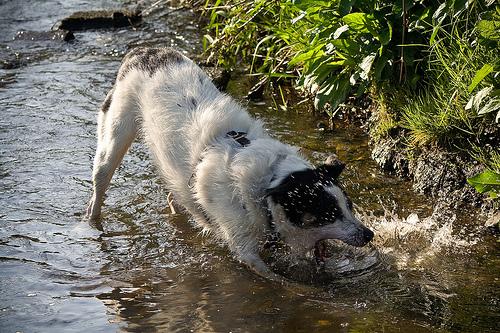

In [35]:
from PIL import Image
img = Image.open('/content/drive/MyDrive/minor/Flicker8k_Dataset/3461041826_0e24cdf597.jpg')
# imagePath = '/content/drive/MyDrive/ML/Flicker8k_Dataset/3738685861_8dfff28760.jpg'
# img = Image.open(imagePath)
img


In [36]:
!python3 '/content/drive/MyDrive/minor/testing_caption_generator.py' -i '/content/drive/MyDrive/minor/Flicker8k_Dataset/3599392711_8264881de2.jpg'
# !python3 '/content/drive/MyDrive/ML/testing_caption_generator.py' -i '/content/drive/MyDrive/ML/Flicker8k_Dataset/3738685861_8dfff28760.jpg'

2025-02-26 11:40:18.490698: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740570018.512291   28546 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740570018.518647   28546 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Traceback (most recent call last):
  File "/content/drive/MyDrive/minor/testing_caption_generator.py", line 1, in <module>
    from keras.preprocessing.text import Tokenizer
ModuleNotFoundError: No module named 'keras.preprocessing.text'
